In [1]:
import numpy as np
import matplotlib.pylab as plt

In [15]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise

print("Min of X: ", X.min())
print("Max of X: ", X.max())
print("Average of the error component: ", e.mean())

Min of X:  0.057374398989252784
Max of X:  9.996852712552423
Average of the error component:  0.029521314618391824


In [16]:
Y = linearCoef*X + Intercept + e

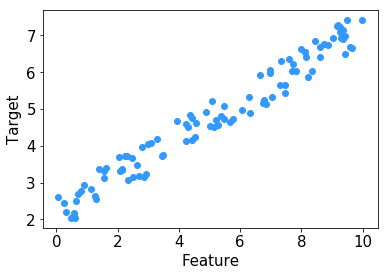

In [17]:
plt.rcParams['font.size'] = 15
plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# features has shape (100,1), while X has shape (100,)
X = X.reshape((numSamples,1))
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit( X_train , Y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

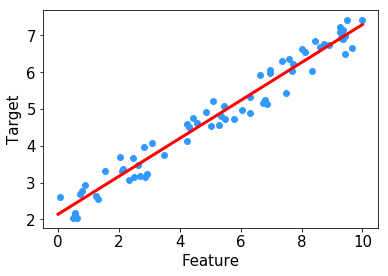

In [20]:
x_array = np.linspace(0,10,100)
y_array = model.predict(x_array.reshape((x_array.shape[0],1 )))

plt.plot(X_train, Y_train, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [21]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [0.51586467]
Intercept:    2.1380014864678047


In [22]:
print(model.score(X_test,Y_test))

0.9555298382383114


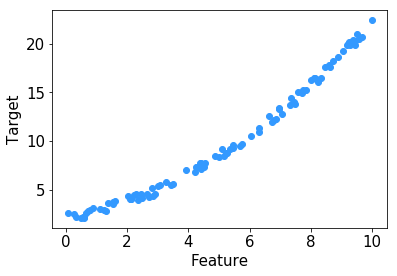

In [23]:
e = e.reshape((len(e),1))
Y = linearCoef*X + 0.15*X**2 + Intercept + e

plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [26]:
features = np.zeros( (len(X_train),2)) #first one is for function, second is topple. 2 columns, for x and x^2
features[:,0] = X_train[:,0]
features[:,1] = X_train[:,0]**2
print(features.shape)

(67, 2)


In [27]:
model = LinearRegression()
model.fit(features,Y_train)

print(model.coef_)
print(model.intercept_)

[[0.43185656 0.15632084]]
[2.34718994]


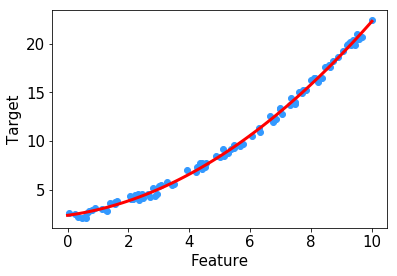

In [29]:
x_array=np.linspace(0,10,100)
y_array =  (x_array * model.coef_[0,0] + x_array**2*model.coef_[0,1] 
                + model.intercept_)

plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [30]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(50, 2)


In [31]:
Y_origin = data[:,0]
X_origin = data[:,1]

X, X_test, Y, Y_test = train_test_split(X_origin, Y_origin, test_size = 0.2, shuffle=False)

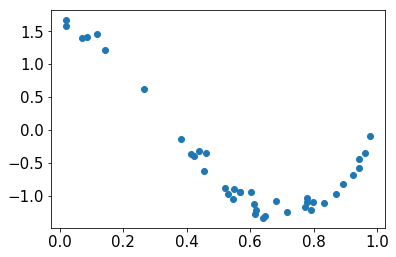

In [32]:
plt.plot(X,Y, 'o')
plt.show()

(40, 1)


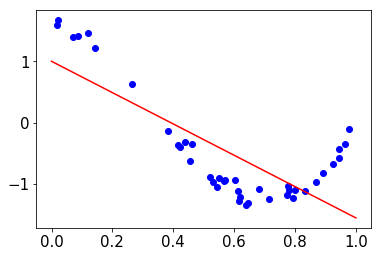

In [42]:
X = X.reshape( (X.shape[0], 1) ) 
print(X.shape)

coefs = []
degrees = []
model = LinearRegression()
model.fit( X , Y )

degrees.append(1)
coefs.append( np.abs(model.coef_).mean() )

x_array = np.linspace(0,1,100)
x_array = x_array.reshape((len(x_array),1))
y_array = model.predict(x_array)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

In [43]:
X_poly = np.c_[ X, X**2 ]
print( X_poly.shape )

(40, 2)


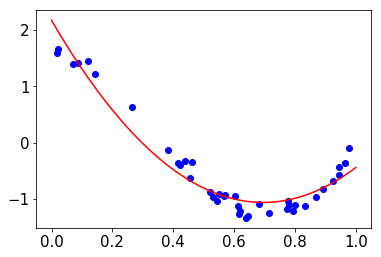

In [44]:
model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(2) #Second degree
coefs.append( np.abs(model.coef_).mean() )

x_array = np.linspace(0,1,100)
x_array_poly = np.c_[ x_array, x_array**2 ]
y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

In [45]:
def getPoly(myArray,degree):
    
    result = np.zeros((myArray.shape[0],degree))
    for j in range(degree):
        result[:,j] = myArray.ravel()**(j+1)
    return result

X_poly = getPoly(X,degree=5)
print(X_poly.shape)

(40, 5)


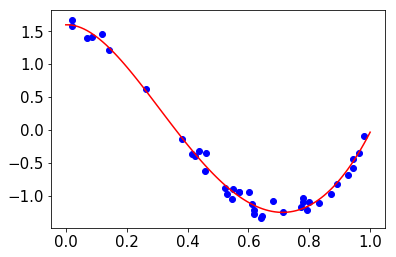

In [48]:
d = 5
X_poly = getPoly(X,degree = d)
x_array_poly = getPoly(x_array,degree = d)

model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

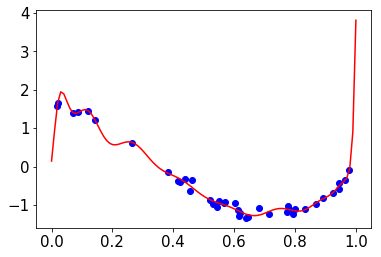

In [49]:
d = 19
X_poly = getPoly(X,degree = d)
x_array_poly = getPoly(x_array,degree = d)

model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

In [50]:
print(degrees)
print(coefs)

[1, 2, 5, 19, 5, 19]
[2.5540778133136683, 8.002743424237451, 16.05819775197944, 229662236133.64987, 16.05819775197944, 229662236133.64987]


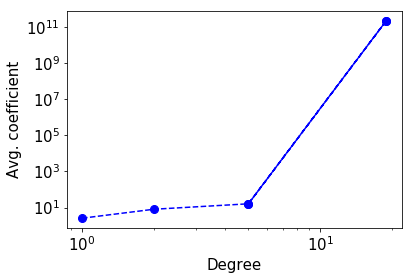

In [55]:
plt.loglog(degrees, coefs,'bo--', markersize=8)

plt.ylabel('Avg. coefficient')
plt.xlabel('Degree')

plt.show()

In [56]:
from sklearn.linear_model import Ridge

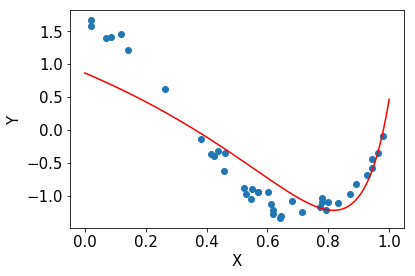

In [59]:
model = Ridge( alpha = 1.0 )
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

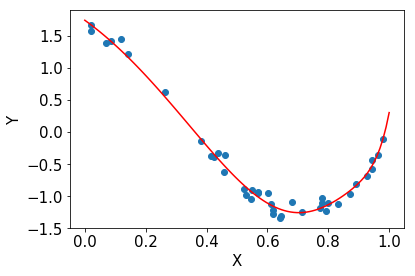

In [60]:
model = Ridge( alpha = 0.001 )
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

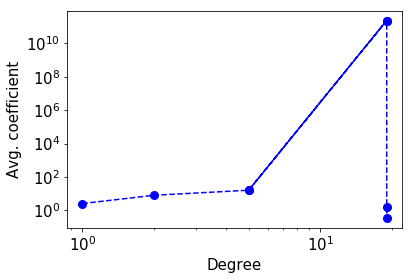

In [61]:
plt.loglog(degrees, coefs,'bo--', markersize=8)

plt.ylabel('Avg. coefficient')
plt.xlabel('Degree')

plt.show()

In [62]:
from sklearn.datasets import load_iris

In [63]:
iris_data = load_iris()
print( iris_data.data.shape )

(150, 4)


In [64]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

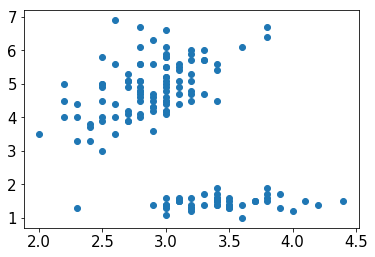

In [65]:
plt.plot( iris_data.data[:,1], iris_data.data[:,2], 'o' )
plt.show()

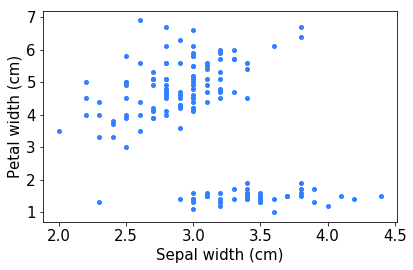

In [66]:
plt.plot( iris_data.data[:,1], iris_data.data[:,2], 'o', 
            color=(0.2,0.5,1.0), markersize=4 )

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

plt.tight_layout()
plt.show()

In [71]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=3)

In [73]:
kmeans.fit( iris_data.data )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
clusters = kmeans.predict( iris_data.data )
print( "Shape: ", clusters.shape )
print( "Cluster IDs: ", clusters )

Shape:  (150,)
Cluster IDs:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [75]:
index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2

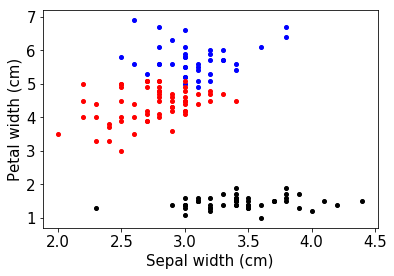

In [76]:
plt.plot( iris_data.data[index0,1], iris_data.data[index0,2], 
            'o', color='b', markersize=4 )
plt.plot( iris_data.data[index1,1], iris_data.data[index1,2], 
            'o', color='k', markersize=4 )
plt.plot( iris_data.data[index2,1], iris_data.data[index2,2], 
            'o', color='r', markersize=4 )

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

plt.show()

In [77]:
from sklearn.decomposition import PCA

In [78]:
# 200 samples with 3 features
X = np.random.random( (200, 3) )   
X[:,2] = X[:,0]

Covariance matrix:
  [[0.08718275 0.01483322 0.08718275]
 [0.01483322 0.08521103 0.01483322]
 [0.08718275 0.01483322 0.08718275]]


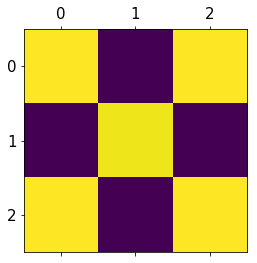

In [79]:
# \n breaks the line
print("Covariance matrix:\n ", np.cov(X.T))  
plt.matshow(np.cov(X.T))
plt.show()

In [80]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
pca.explained_variance_ratio_

array([6.89795278e-01, 3.10204722e-01, 9.28083235e-34])

In [82]:
pca.components_

array([[ 0.69007611,  0.21815116,  0.69007611],
       [-0.15425617,  0.97591499, -0.15425617],
       [-0.70710678, -0.        ,  0.70710678]])

[[ 1.79054665e-01  2.62213478e-17  1.43152067e-17]
 [ 2.62213478e-17  8.05218655e-02 -1.62345616e-18]
 [ 1.43152067e-17 -1.62345616e-18  1.30874248e-33]]


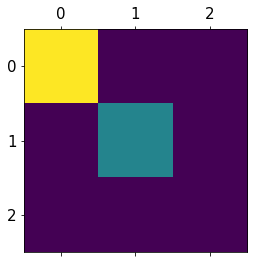

In [83]:
X_transform = pca.transform(X)
print(np.cov(X_transform.T))
plt.matshow(np.cov(X_transform.T))
plt.savefig('CovMatrix_example_PCA.png', dpi=300)
plt.show()

In [84]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

In [85]:
X, X_test, Y, Y_test = train_test_split(
        bcancer.data,bcancer.target,test_size=0.2,
        shuffle=False)

In [86]:
pca = PCA()
pca.fit( X )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

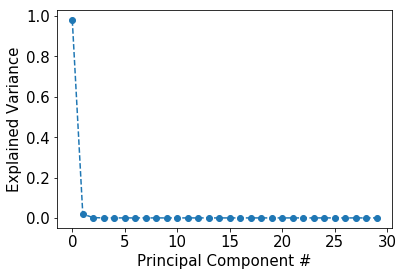

In [87]:
plt.plot( pca.explained_variance_ratio_, 'o--' )
plt.ylabel( 'Explained Variance' )
plt.xlabel( 'Principal Component #' )
plt.show()

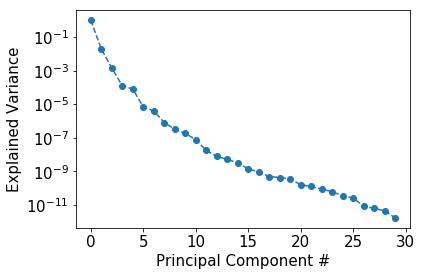

In [88]:
plt.plot( pca.explained_variance_ratio_, 'o--' )
plt.ylabel( 'Explained Variance' )
plt.yscale('log')
plt.xlabel( 'Principal Component #' )
plt.show()

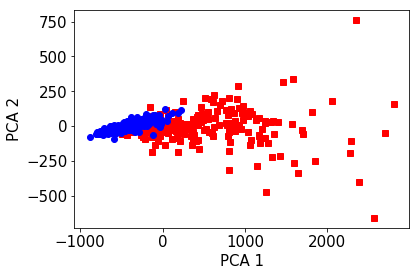

In [89]:
X_PCAs = pca.transform( X )
X_PCAs = X_PCAs[:,:2]

index0 = (Y == 0)
index1 = (Y == 1)

plt.plot( X_PCAs[index0,0], 
         X_PCAs[index0,1], 's', color='r' )
plt.plot( X_PCAs[index1,0], 
         X_PCAs[index1,1], 'o', color='b' )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [91]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
clf.fit(X_PCAs,Y)


X_test_PCAs = pca.transform( X_test )
clf.score(X_test_PCAs[:,:2],Y_test)

0.9210526315789473